## CUSTOMER CHURN DATA PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore') 


## Importing CSV File

In [2]:
Customer_churn_data = pd.read_csv("Customer_churn_data.csv")

### Viewing Data

In [3]:
Customer_churn_data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
Customer_churn_data.tail(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [5]:
Customer_churn_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
Customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
Customer_churn_data.shape

(64374, 12)

In [8]:
Customer_churn_data.dropna(inplace=True)

In [9]:
Customer_churn_data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [10]:
Customer_churn_data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [11]:
Customer_churn_data.nunique()

CustomerID           64374
Age                     48
Gender                   2
Tenure                  60
Usage Frequency         30
Support Calls           11
Payment Delay           31
Subscription Type        3
Contract Length          3
Total Spend            901
Last Interaction        30
Churn                    2
dtype: int64

#### Filtering the rows

In [12]:
Customer_churn_data.iloc[0:5]   

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [13]:
Customer_churn_data.loc[16:200]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
16,17,29,Male,54,3,6,2,Basic,Monthly,636,22,0
17,18,45,Male,9,30,4,25,Basic,Annual,127,18,0
18,19,65,Female,40,2,1,6,Premium,Annual,396,21,0
19,20,62,Male,39,19,2,15,Premium,Quarterly,202,24,0
20,21,48,Male,28,7,1,21,Premium,Monthly,925,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,39,Male,29,25,4,2,Standard,Quarterly,254,20,0
197,198,19,Male,17,11,6,24,Standard,Quarterly,715,15,0
198,199,29,Female,56,21,3,26,Basic,Quarterly,239,29,1
199,200,45,Female,20,1,4,15,Standard,Monthly,224,13,0


#### Churn filter data by Gender = Male

In [14]:
Churn_data_male = Customer_churn_data[Customer_churn_data['Gender'] == 'Male']

In [15]:
Churn_data_male.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


#### Churn filter data by Gender = Female

In [16]:
Churn_data_female = Customer_churn_data[Customer_churn_data['Gender'] == 'Female']

In [17]:
Churn_data_female.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0


#### Churn filter data Subscription = Basic & Standard & Premium

In [18]:
Churn_data_basic_subscription = Customer_churn_data[Customer_churn_data['Subscription Type'] == 'Basic']
Churn_data_standard_subscription = Customer_churn_data[Customer_churn_data['Subscription Type'] == 'Standard']
Churn_data_premium_subscription = Customer_churn_data[Customer_churn_data['Subscription Type'] == 'Premium']

In [19]:
Churn_data_basic_subscription.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0
11,12,56,Male,13,23,5,14,Basic,Quarterly,187,1,0


In [20]:
Churn_data_standard_subscription.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
10,11,46,Female,42,27,9,21,Standard,Annual,526,3,1
22,23,55,Male,50,28,0,17,Standard,Quarterly,449,3,0


In [21]:
Churn_data_premium_subscription.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
12,13,31,Male,2,7,0,25,Premium,Quarterly,758,24,0
13,14,42,Male,46,27,5,8,Premium,Quarterly,438,30,0


#### Churn data contract length filter by Annual,Quarterly,Monthly_Wise

In [22]:
Churn_data_annual_contract_length = Customer_churn_data[Customer_churn_data['Contract Length'] == 'Annual']
Churn_data_quarterly_contract_length = Customer_churn_data[Customer_churn_data['Contract Length'] == 'Quarterly']
Churn_data_monthly_contract_length = Customer_churn_data[Customer_churn_data['Contract Length'] == 'Monthly']


In [23]:
Churn_data_annual_contract_length.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0
10,11,46,Female,42,27,9,21,Standard,Annual,526,3,1
17,18,45,Male,9,30,4,25,Basic,Annual,127,18,0


In [24]:
Churn_data_quarterly_contract_length.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
11,12,56,Male,13,23,5,14,Basic,Quarterly,187,1,0
12,13,31,Male,2,7,0,25,Premium,Quarterly,758,24,0
13,14,42,Male,46,27,5,8,Premium,Quarterly,438,30,0


In [25]:
Churn_data_monthly_contract_length.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0


In [26]:
Customer_churn_data.drop(['Usage Frequency','Support Calls','Payment Delay'],axis=1).head()

,CustomerID,Age,Gender,Tenure,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,Basic,Monthly,598,9,1
1,2,41,Female,28,Standard,Monthly,584,20,0
2,3,47,Male,27,Premium,Annual,757,21,0
3,4,35,Male,9,Premium,Quarterly,232,18,0
4,5,53,Female,58,Standard,Annual,533,18,0


##### Total Spend Column sum and value counts

In [27]:
Number_of_spend_value = Customer_churn_data['Total Spend'].sum()

In [28]:
Number_of_spend_value

34827839

In [29]:
Customer_churn_data_total_spend_values_count = Customer_churn_data['Total Spend'].value_counts()

In [30]:
Customer_churn_data_total_spend_values_count

Total Spend
226     103
736      99
195      97
546      97
373      97
       ... 
545      46
960      45
968      44
100      36
1000     35
Name: count, Length: 901, dtype: int64

In [31]:
Total_spend_fil = Customer_churn_data.sort_values(by = ['Total Spend'],ascending= False).head(5)

In [32]:
Total_spend_fil

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
37461,37462,43,Male,5,9,8,15,Basic,Quarterly,1000,4,0
40,41,29,Female,28,23,7,16,Basic,Quarterly,1000,26,1
45253,45254,50,Male,49,15,5,25,Basic,Monthly,1000,17,1
28861,28862,28,Female,6,15,0,6,Standard,Annual,1000,29,0
16972,16973,22,Female,5,23,6,12,Premium,Quarterly,1000,8,0


In [33]:
Customer_churn_data.sort_values(by = ['Last Interaction'],ascending= False).head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
41290,41291,42,Female,48,10,3,25,Premium,Quarterly,586,30,0
7366,7367,59,Male,43,17,7,8,Premium,Quarterly,674,30,0
45849,45850,37,Female,48,20,8,27,Premium,Quarterly,428,30,1
45846,45847,51,Female,57,20,9,23,Basic,Quarterly,309,30,1
45770,45771,60,Female,8,13,5,30,Basic,Monthly,679,30,1


In [34]:
Total_Spend_Quarterly = Customer_churn_data[(Customer_churn_data['Tenure'] >= 15) & (Customer_churn_data['Total Spend'] >= 500)]

In [35]:
Total_Spend_Quarterly

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64366,64367,64,Male,30,27,9,28,Premium,Annual,884,21,1
64367,64368,51,Male,47,17,10,26,Basic,Annual,544,24,1
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [36]:
Premium_fil = Customer_churn_data[(Customer_churn_data['Subscription Type'] == 'Premium') & (Customer_churn_data['Total Spend'] >= 100)]

In [37]:
Premium_fil.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
12,13,31,Male,2,7,0,25,Premium,Quarterly,758,24,0
13,14,42,Male,46,27,5,8,Premium,Quarterly,438,30,0


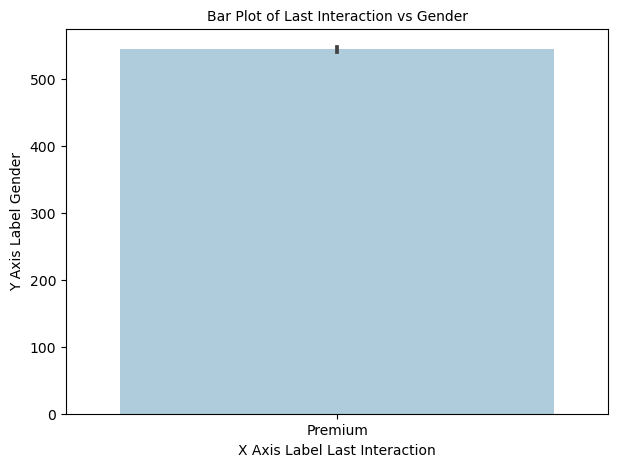

In [38]:
plt.figure(figsize=(7,5))
sns.barplot(x='Subscription Type', y='Total Spend', data=Premium_fil, palette='Paired')
plt.title("Bar Plot of Last Interaction vs Gender", fontsize=10)  # Replace with your column names
plt.xlabel("X Axis Label Last Interaction", fontsize=10)
plt.ylabel("Y Axis Label Gender", fontsize=10)
plt.show()


# EDA (Exploratory Data Analysis)

### Gender

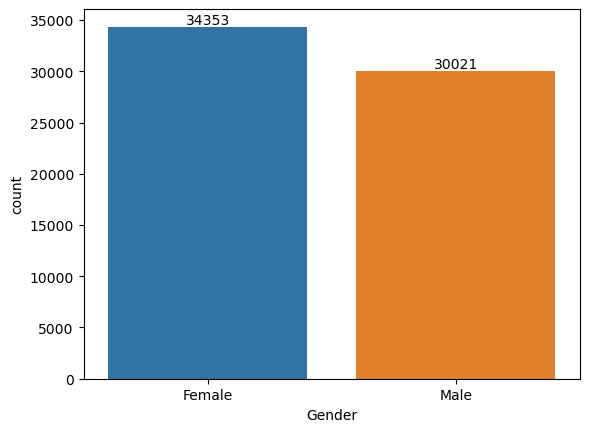

In [39]:
# plotting a bar chart for Gender and it's count

Gender_eda = sns.countplot(x = 'Gender',data = Customer_churn_data)

for bars in Gender_eda.containers:
    Gender_eda.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Total Spend'>

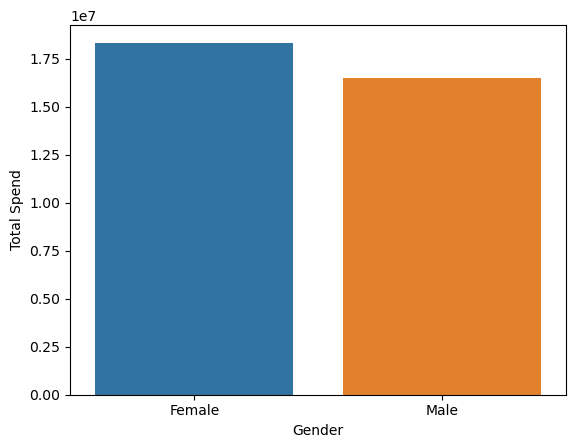

In [40]:
# plotting a bar chart for gender vs total spend

Gender_VS_Total_Spend = Customer_churn_data.groupby(['Gender'], as_index=False)['Total Spend'].sum().sort_values(by='Total Spend', ascending=False)

sns.barplot(x = 'Gender',y= 'Total Spend' ,data = Gender_VS_Total_Spend)

#### Age

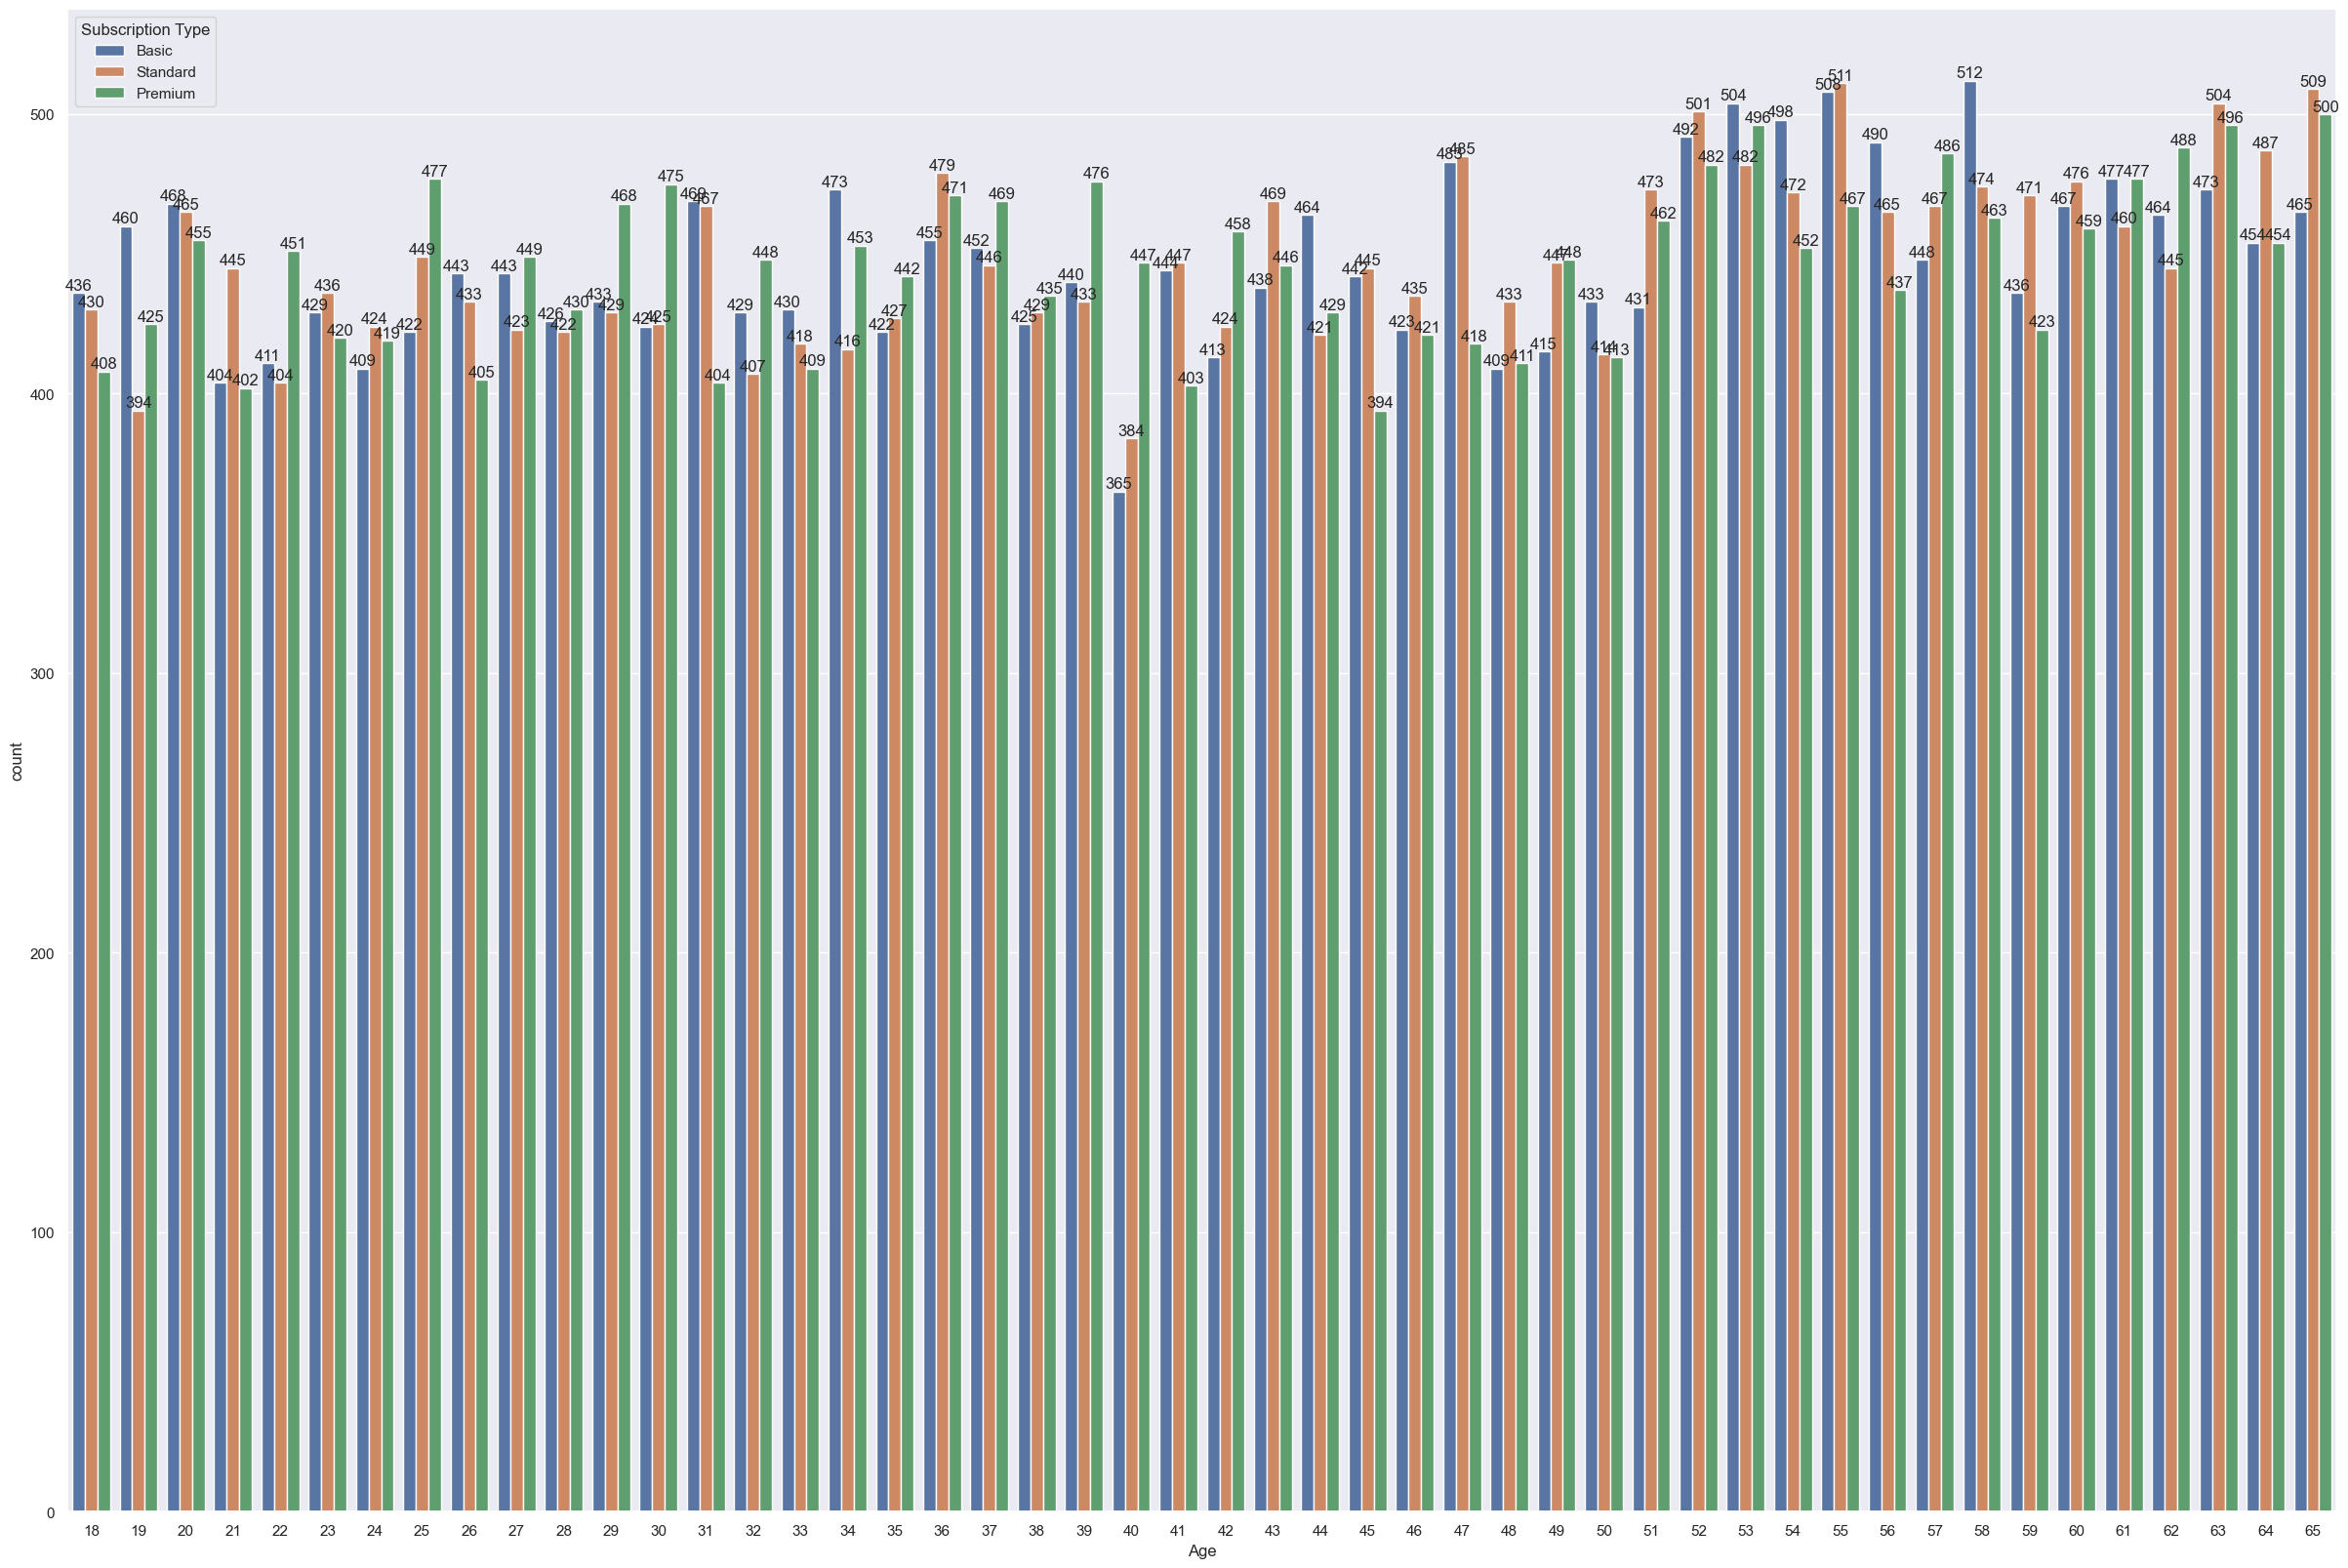

In [56]:
Age_Subs = sns.countplot(data = Customer_churn_data, x = 'Age', hue = 'Subscription Type')
sns.set(rc={'figure.figsize':(10,7)})
for bars in Age_Subs.containers:
    Age_Subs.bar_label(bars)

<Axes: xlabel='Subscription Type', ylabel='Age'>

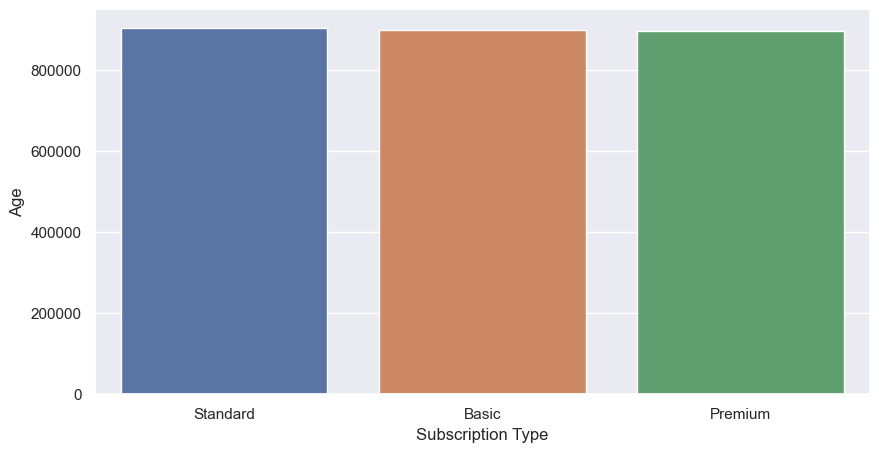

In [42]:
# Age as per certain subscription type.

Age_VS_Subscription_Type = Customer_churn_data.groupby(['Subscription Type'], as_index=False)['Age'].sum().sort_values(by='Age', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x = 'Subscription Type',y= 'Age' ,data = Age_VS_Subscription_Type)

### Tenure

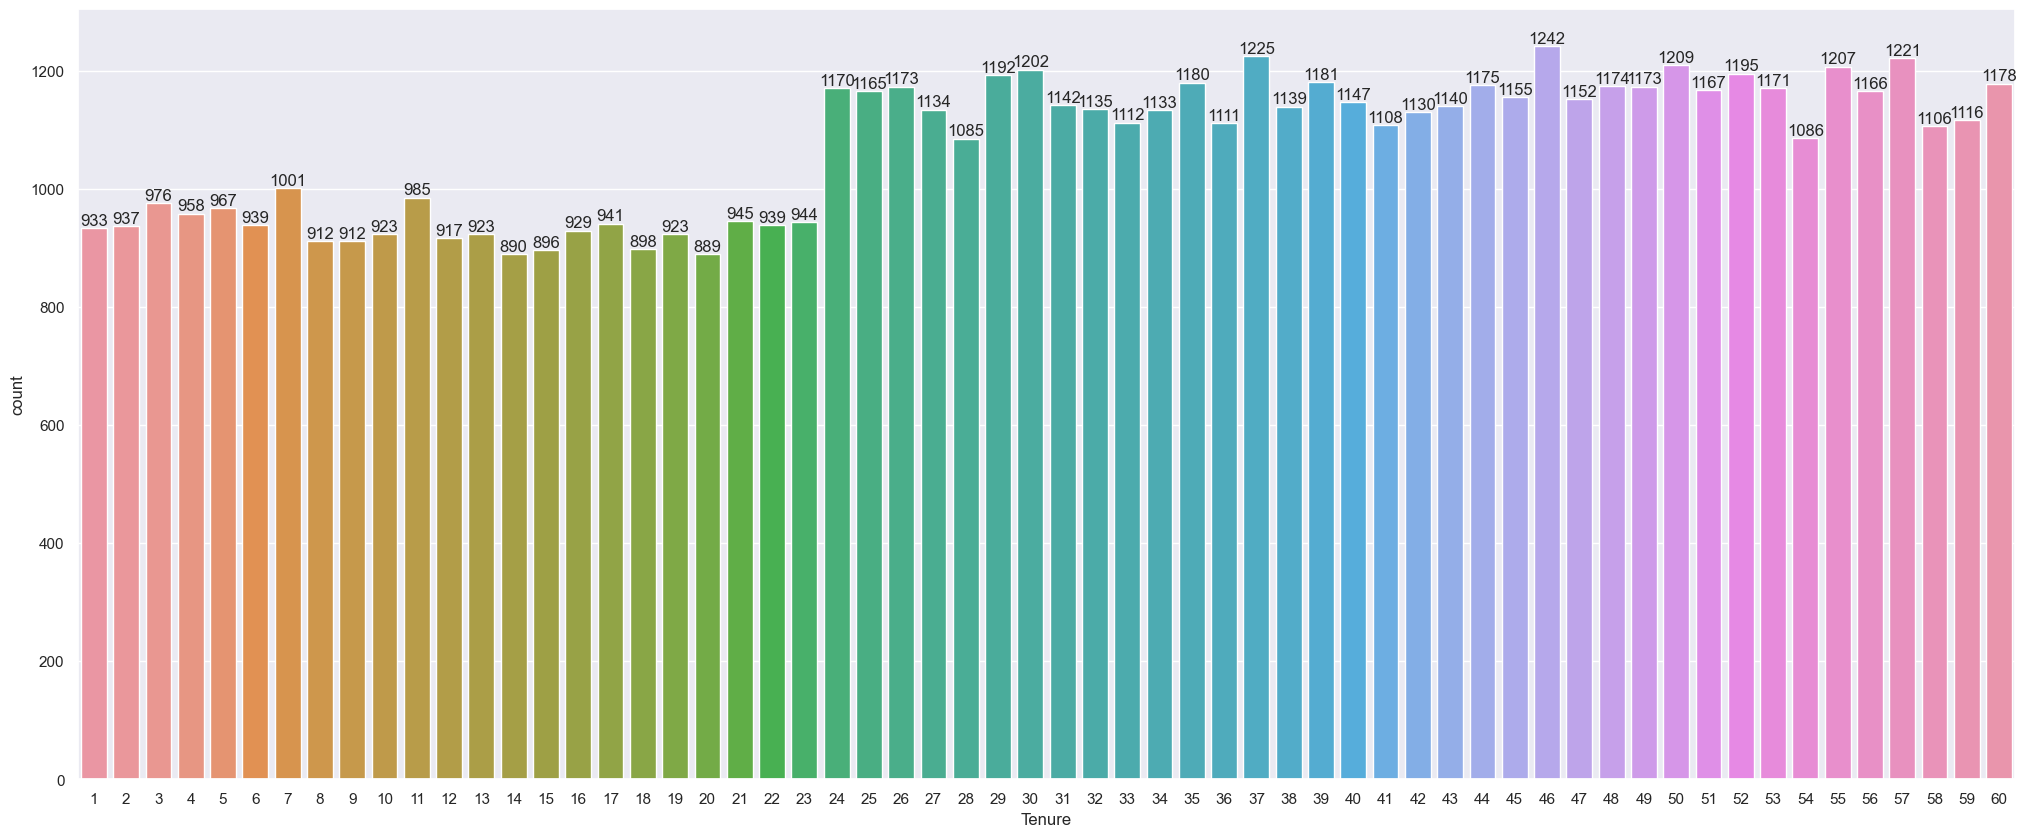

In [64]:
# plotting a bar chart for Tenure how customer still woeking with us and it's count

Tenure_count = sns.countplot(x = 'Tenure',data = Customer_churn_data)
sns.set(rc={'figure.figsize':(25,13)})
for bars in Tenure_count.containers:
    Tenure_count.bar_label(bars)

<Axes: xlabel='Contract Length', ylabel='Tenure'>

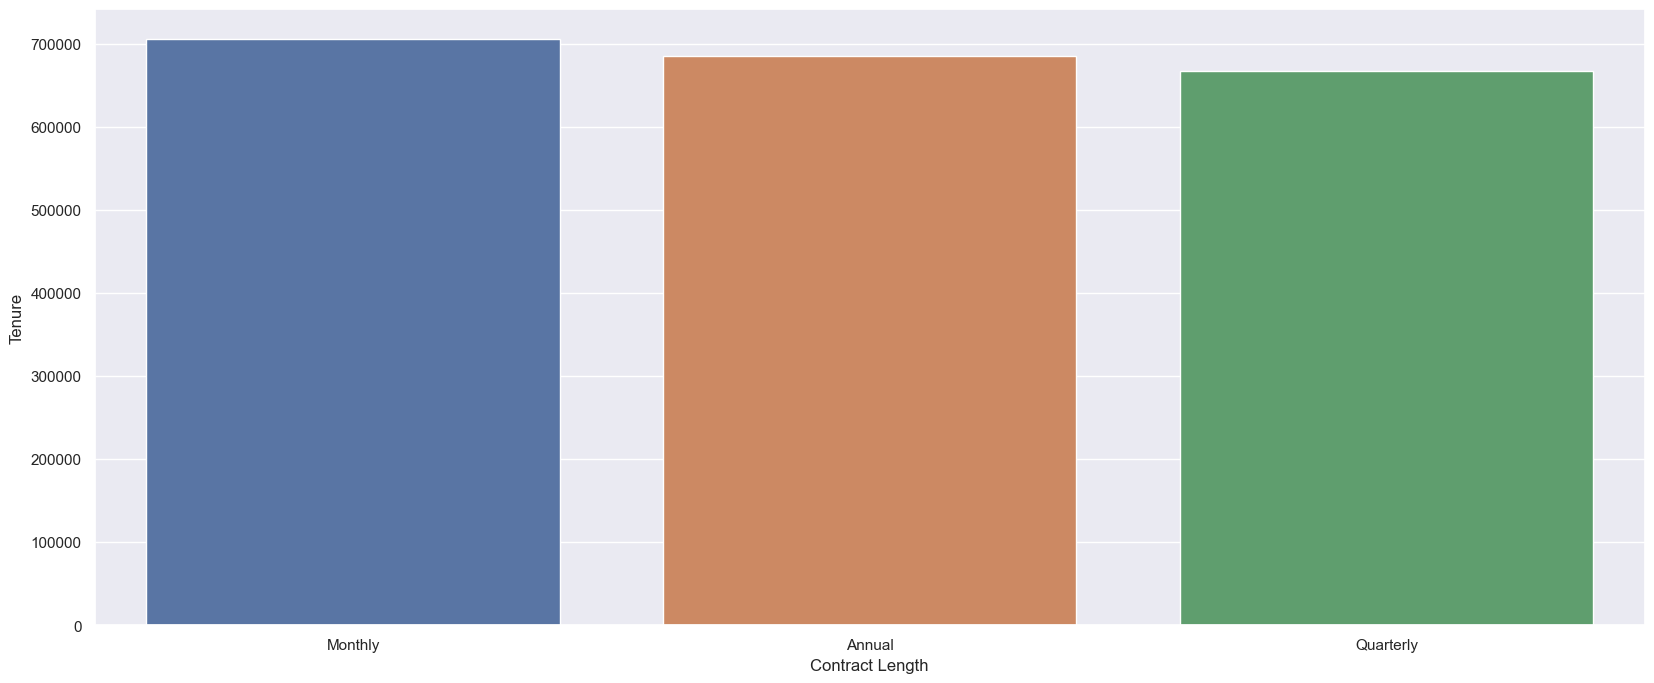

In [44]:
# total number of orders from top 10 states

Conlen_Total_Tenure = Customer_churn_data.groupby(['Contract Length'], as_index=False)['Tenure'].sum().sort_values(by='Tenure', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data = Conlen_Total_Tenure, x = 'Contract Length',y= 'Tenure')

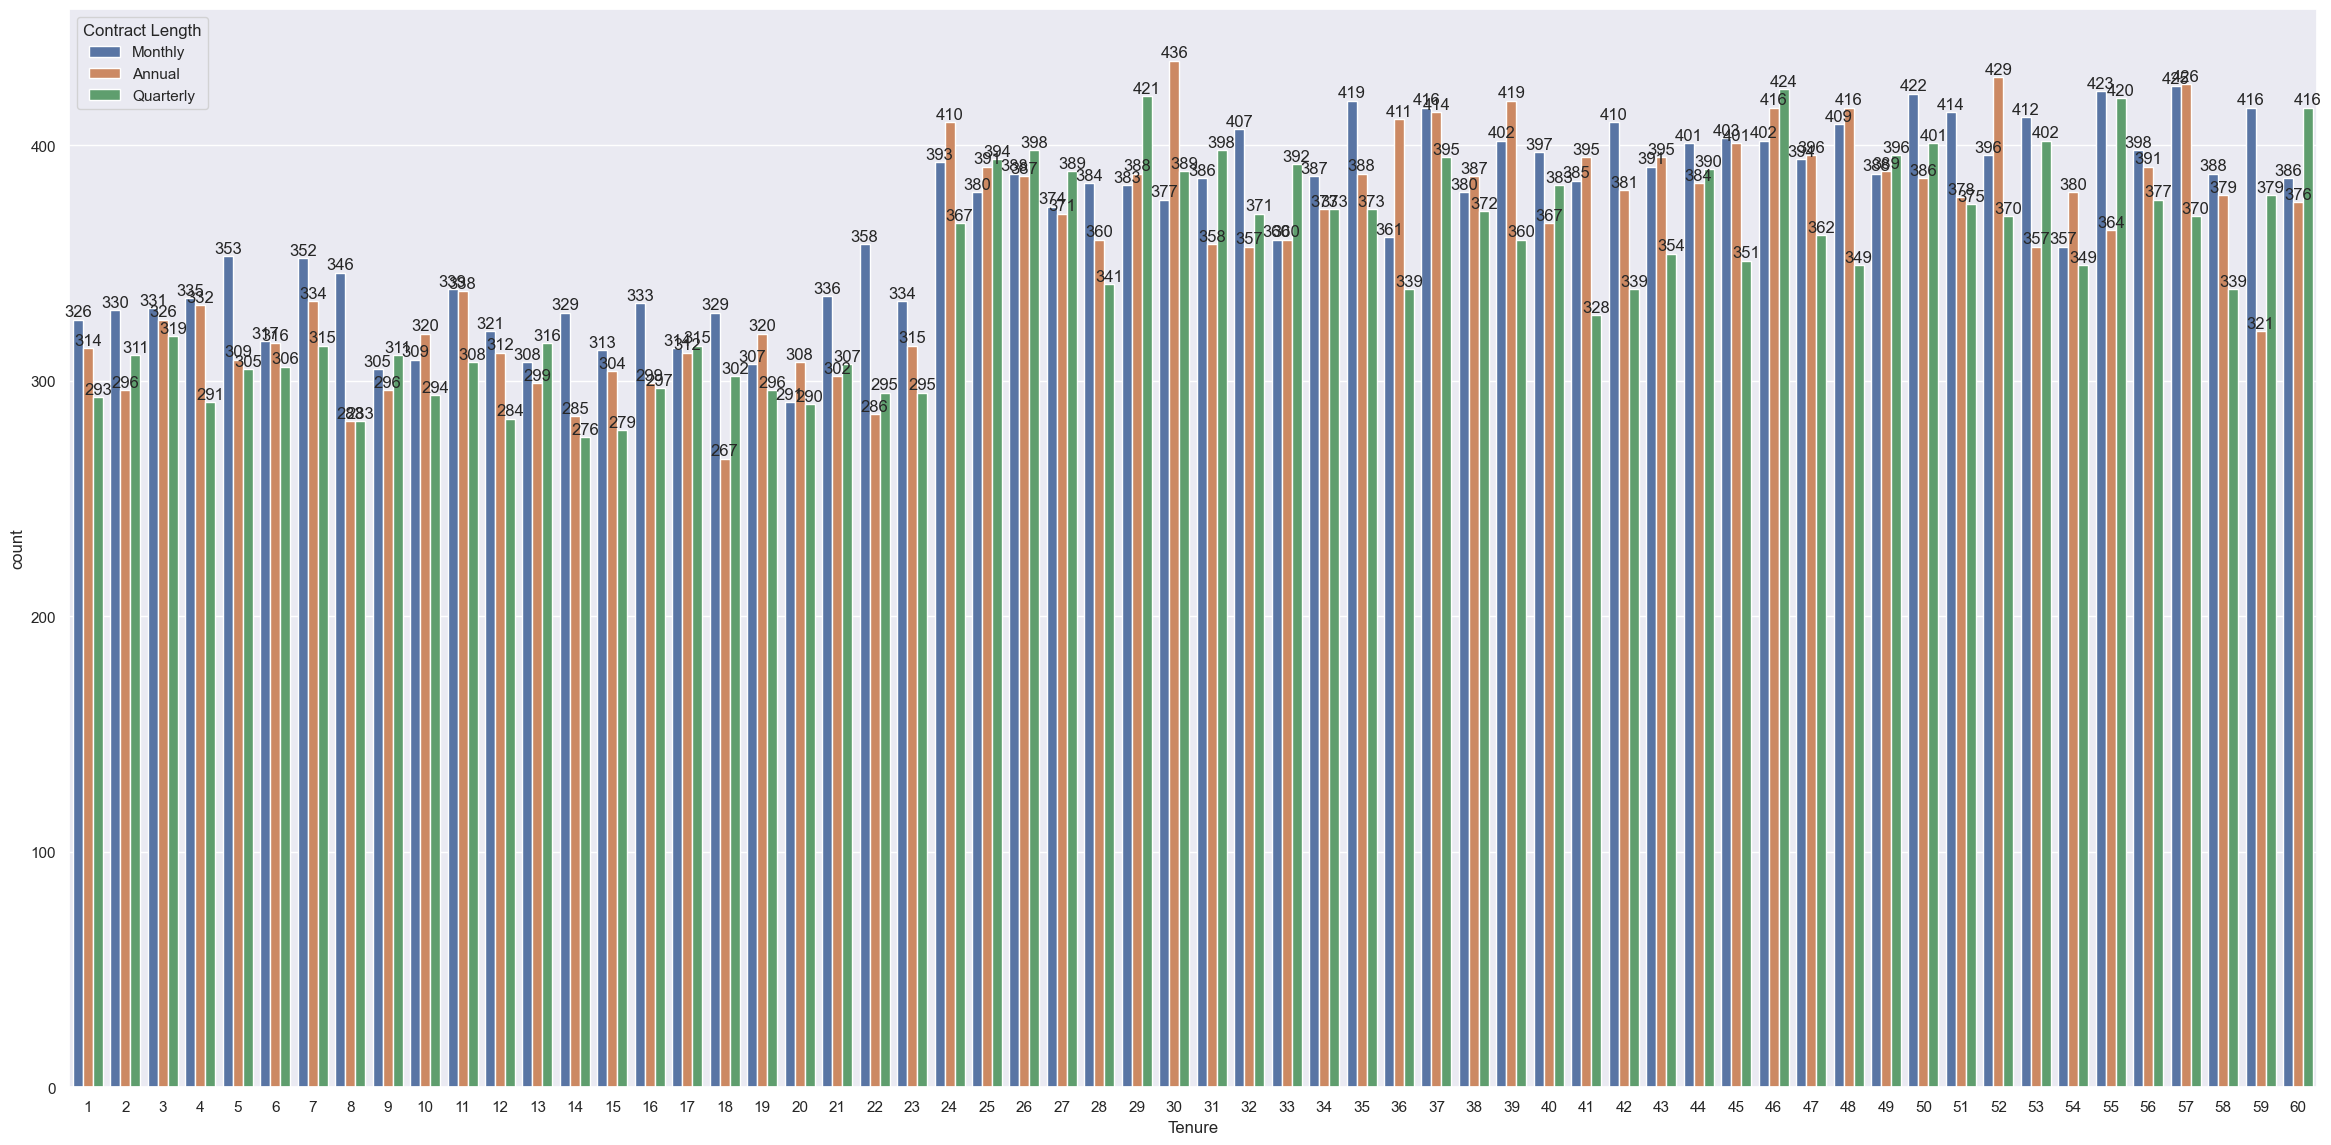

In [74]:
Tenure_Con_len = sns.countplot(data = Customer_churn_data, x = 'Tenure', hue = 'Contract Length')
sns.set(rc={'figure.figsize':(29,18)})
for bars in Tenure_Con_len.containers:
    Tenure_Con_len.bar_label(bars)

In [54]:
Corr_churn.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000


<Axes: xlabel='Total Spend', ylabel='Contract Length'>

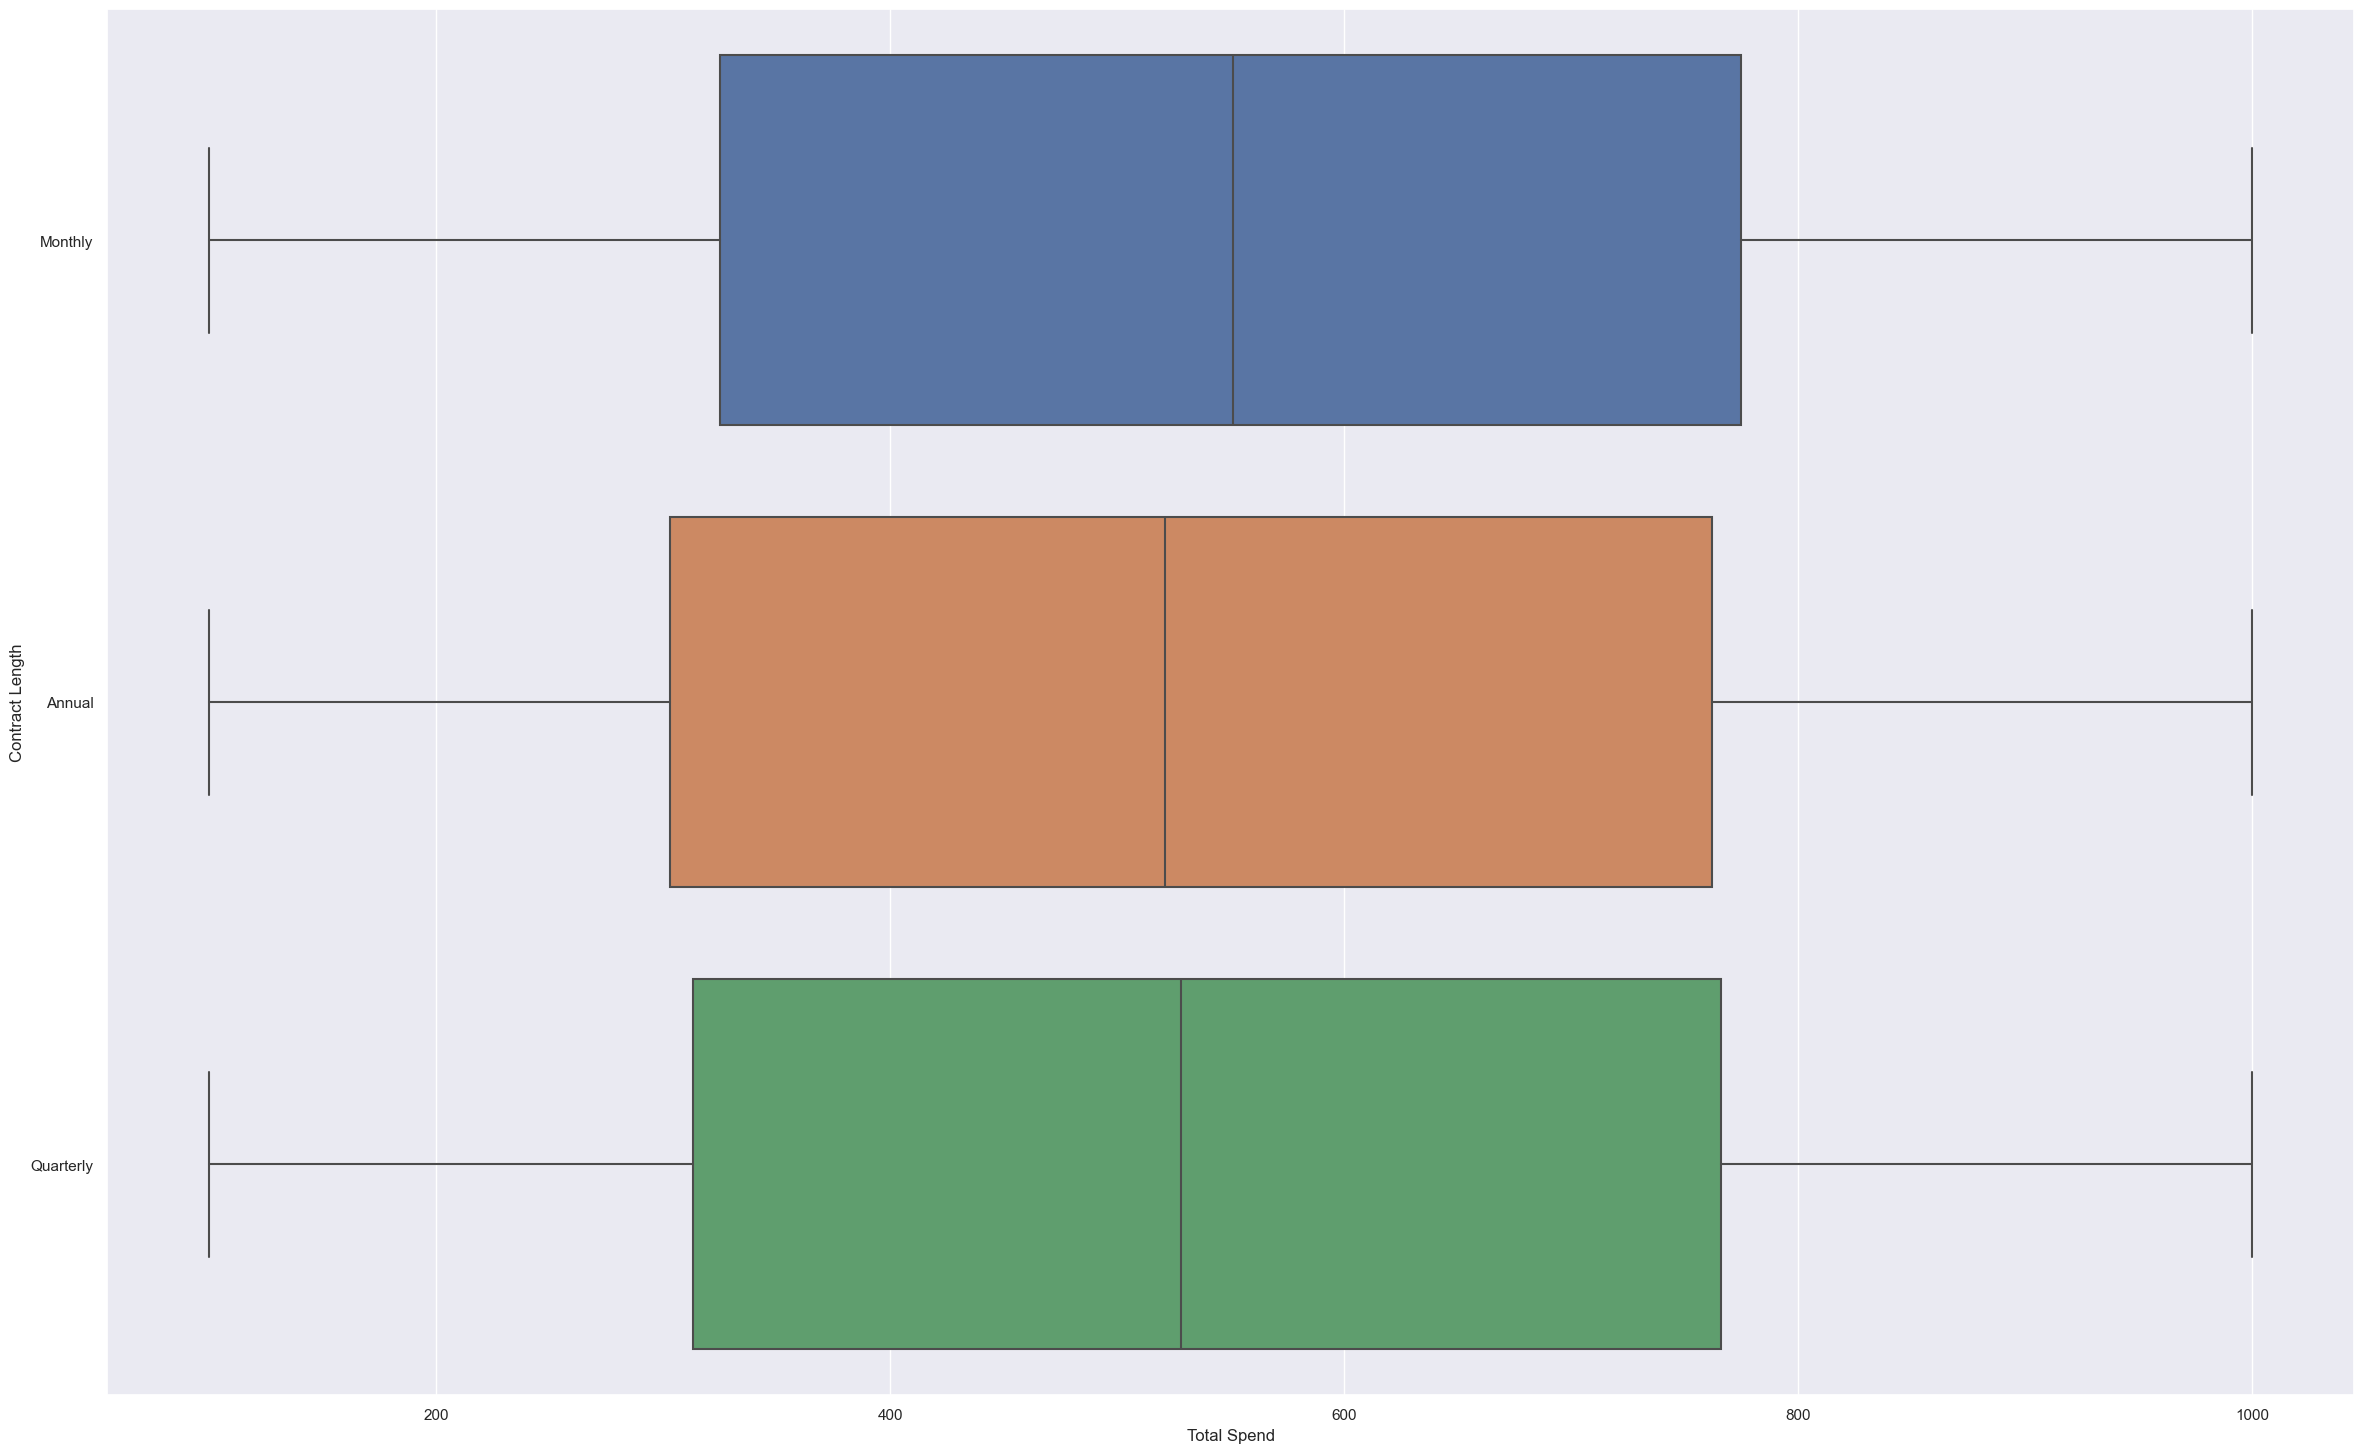

In [78]:
sns.boxplot(x = 'Total Spend', y = 'Contract Length',data = Customer_churn_data)

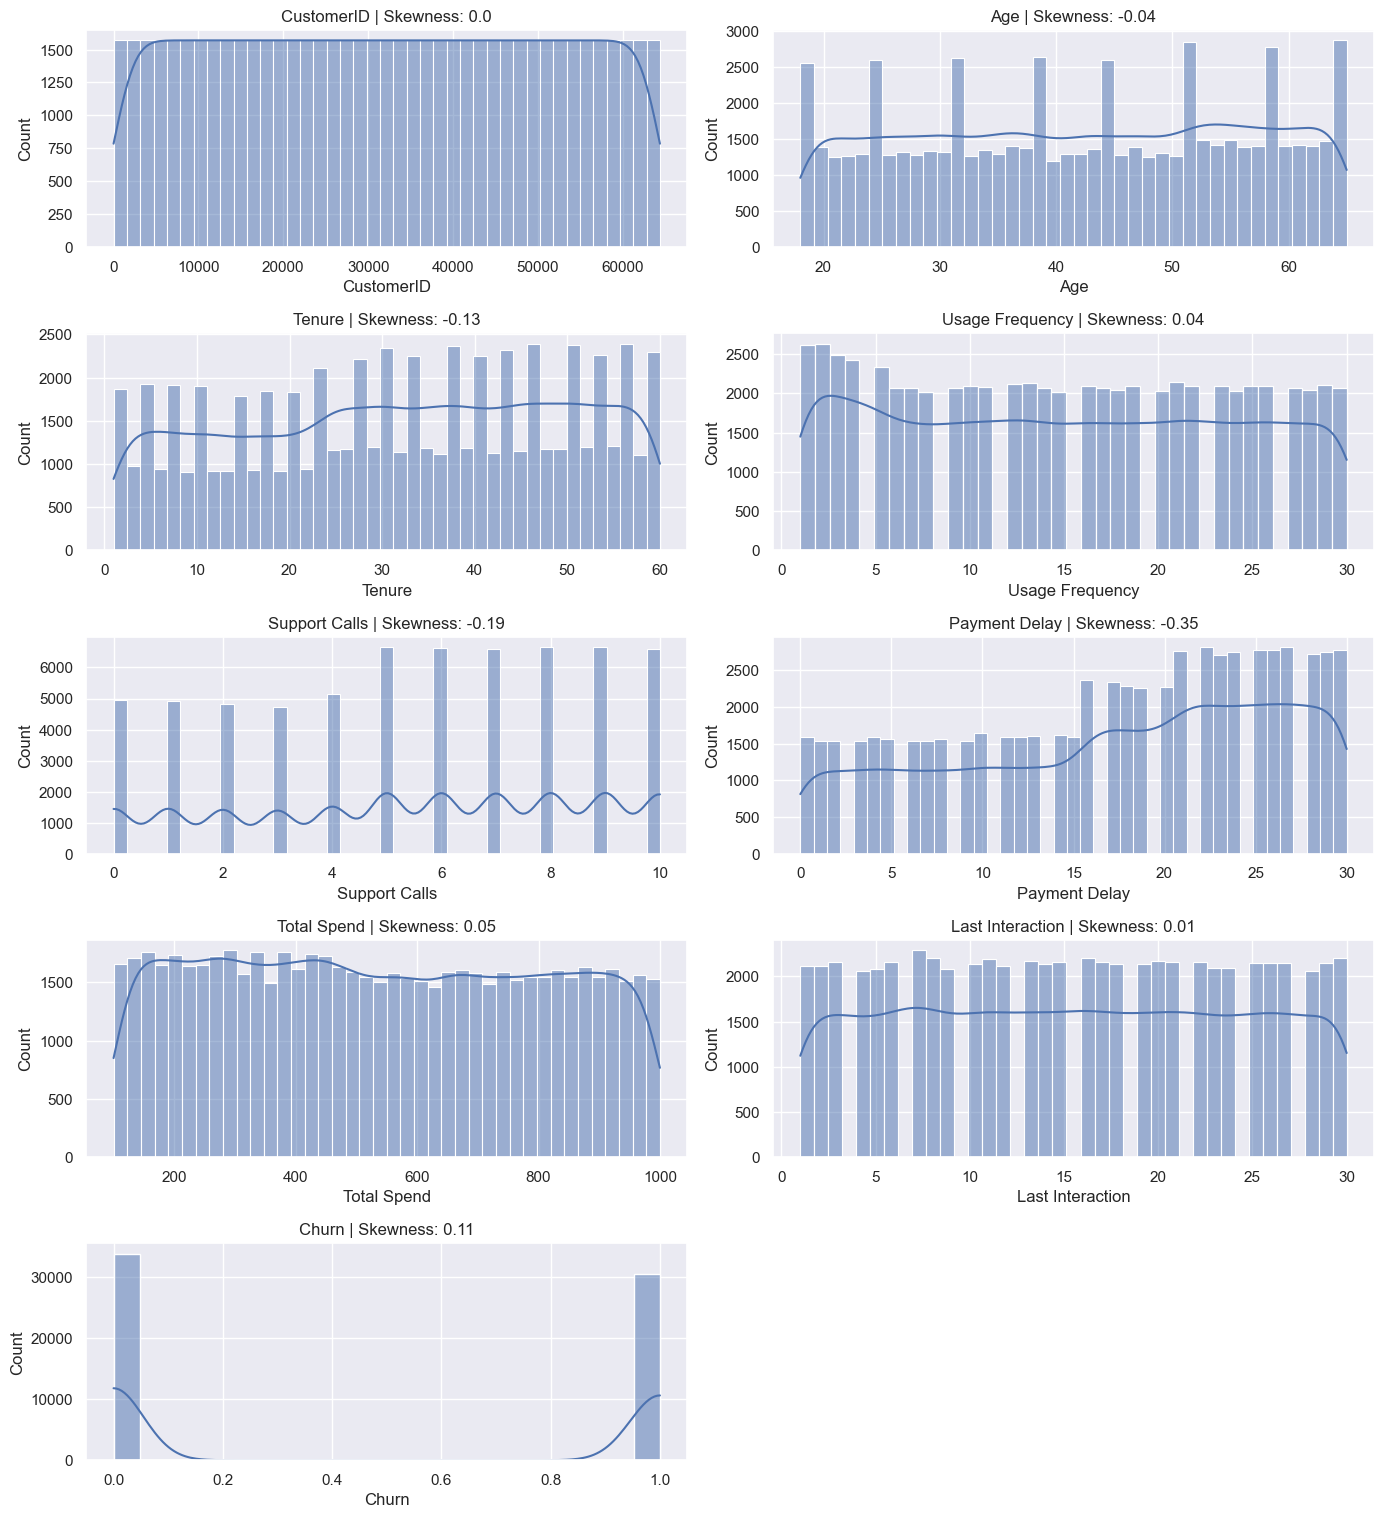

In [79]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = Customer_churn_data.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(Customer_churn_data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(Customer_churn_data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [80]:
Corr_churn = Customer_churn_data[['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction','Churn']].describe().astype(float)

In [81]:
Corr_churn.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000


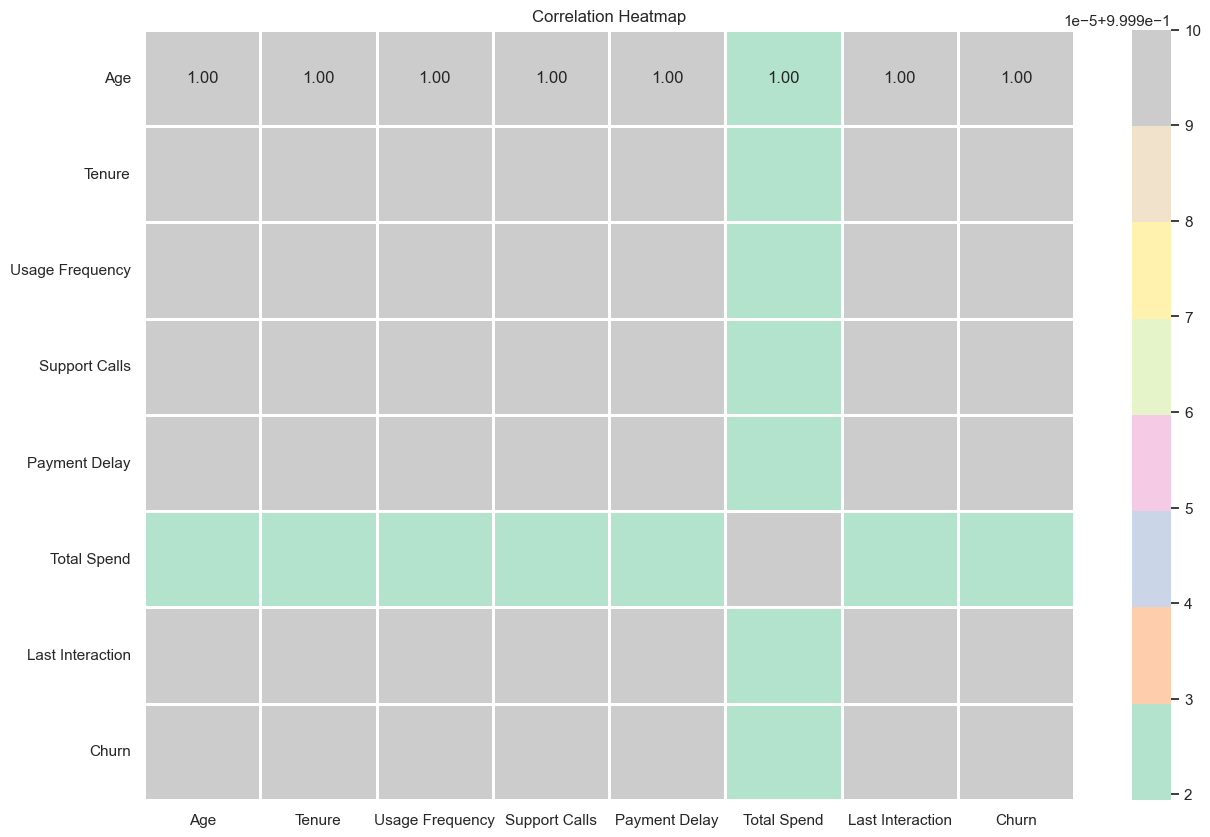

In [55]:

plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(Corr_churn.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()
